我們開始評估GPT-4在面對需要數學思考和建立模型的問題時，能夠很好地表達數學概念、解
決數學問題和應用定量推理。我們證明GPT-4在這個領域也比以前的LLM有了很大的進步，即使與Minerva
等專門為數學模型進行微調的模型相比也是如此。然而，GPT-4似乎離專家的水平還很遠，不具備進行數學
研究的能力。

請讀者註意，正確解釋本節的結果是一項困難的工作。正如我們將看到的，GPT-4可以回答困難的（實
際上是有競爭力的）高中水平的數學問題，有時可以圍繞高級數學主題進行有意義的對話。然而，它也會犯
非常基本的錯誤，偶爾會產生不連貫的輸出，這可能被解釋為缺乏真正的理解。它的數學知識和能力可以以
一種看似隨意的方式取決於背景。

**Prompt:** 

Within the duration of one year, a rabbit population rst multiplies itself by a factor a and on the last
day of the year b rabbits are taken by humans for adoption. Supposing that on rst day of the rst year there are x
rabbits, we know that exactly 3 years afterwards there will be a population of 27x 􀀀 26 rabbits. What are the values of
a and b?

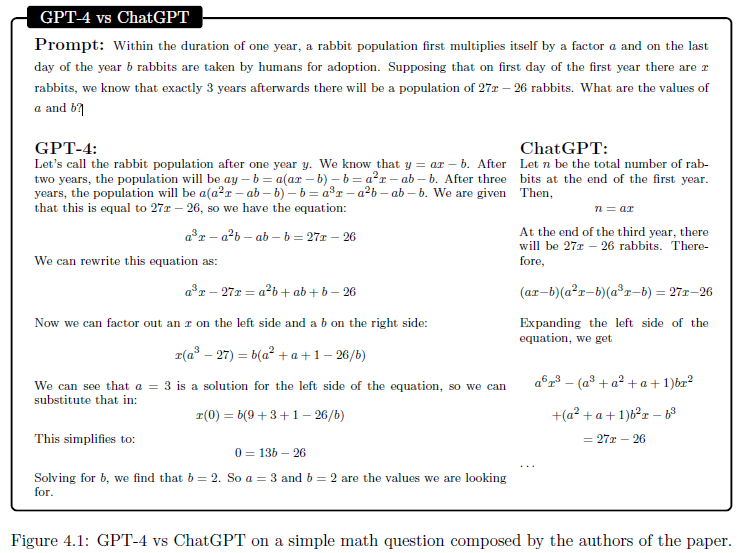

**4.1 A mathematical conversation with GPT-4**

現在我們試圖通過以討論的形式對這個問題提出幾個後續問題，來進一步探究模型的理解。這個討論將強調
模型的一些局限性，以及與人類的一些關鍵區別。

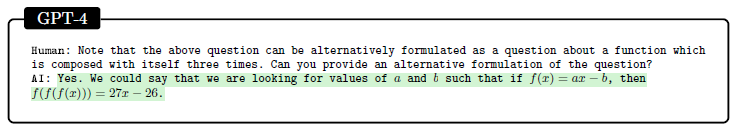

4.1.1 A first generalization of the original question

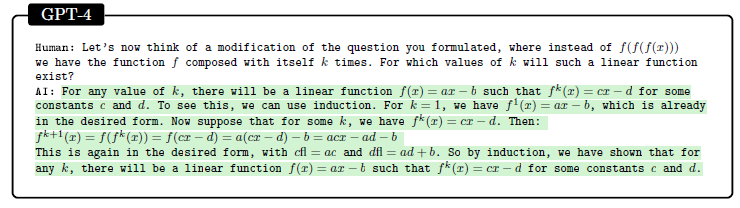

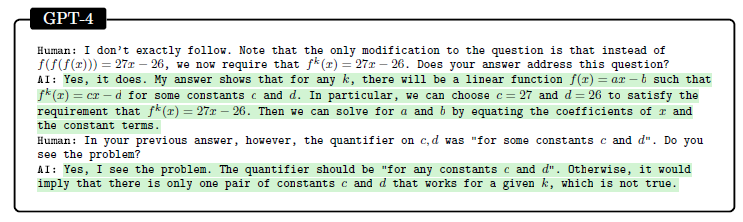

4.1.2 A second variant of the original question

接下來，我們嘗試從另一個方向修改原來的問題，詢問高階多項式的情況。

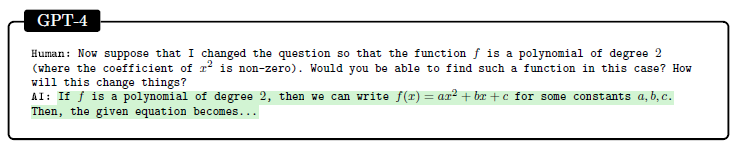

4.1.3 Analysis of the limitations highlighted by conversation

數學理解有幾
個方面：
1. 創造性推理：識別哪些論據、中間步驟、計算或代數操作在每個階段可能是相關的，以規劃出一條通
往解決方案的道路的能力。這一部分通常是基於啟發式的猜測（或者在人類的情況下，是直覺），並
且通常被認為是數學問題解決的最實質和最深刻的方面。
2. 技術熟練程度：按照規定的步驟進行常規計算或操作的能力（如對一個函數進行微分或對一個方程中
的某項進行分離）。
3. 批判性推理：批判性地檢查論證的每一步，將其分解為各個子部分，解釋它所包含的內容，它與論證
的其他部分的關係，以及它為什麼是正確的。當解決一個問題或產生一個數學論證時，這通常伴隨著
當意識到某一步驟不正確時回溯的能力，並相應地修改論證。
我們現在要分析該模型在數學理解的這些方面的表現，並討論其優點和缺點的一些可能原因。

4.2 Performance on mathematical problem datasets

我們現在進行系統的實驗，比較GPT-4、ChatGPT和Minerva（用於解決數學問題的最先進的LLM）在兩個通
常用作基準的數學數據集上的性能：GSM8K [CKB+ 21] 和MATH [HBK +21]。 GSM8K是一個小學數學數據
集，包含8000個問題和答案，主題包括算術、分數、幾何和文字問題。 MATH是一個高中數學數據集，包含
12,500個問題和答案，主題包括代數、微積分、三角學和概率。我們還在MMMLU-STEM數據集上測試了該
模型，該數據集包含約2000道多選題（4選1），涵蓋高中和大學STEM主題。這些數據集突出了GPT-4使用
正確方法解決高中水平數學問題的能力。

**緩解過度擬合。**

使用基準來評估LLM的推理能力的一個潛在問題是，他們可能在預訓練期間記住了基準
數據集的問題或答案，因為這些問題可能是數據集的一部分。為了減少這種形式的過擬合的可能性，我們
採取了以下策略：
1. 在基準測試中，我們通過要求GPT-4(1)編寫解決問題的模板來測試它、
(2)先寫下步驟，再寫下最終答案。模板不在網上，MMMLU-STEM等數據集的詳細解決方案也不在網
上（只有答案在）。
2. 我們從數據集中選取一個有代表性的問題，其中GPT-4解題正確，而text-davinci-003解題不正確。我們
改變問題中的數字，發現GPT-4一貫正確，而text-davinci-003一貫錯誤。
3. 我們還精心設計了幾個新問題，仔細檢查了這些問題或接近的變體沒有出現在網上。看來，GPT-4在這
些問題上表現出了相同的性能。

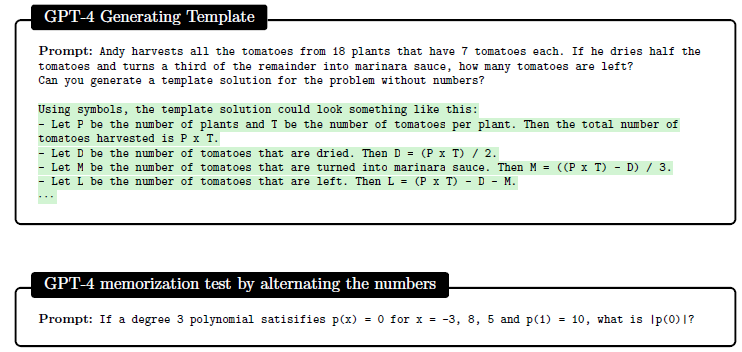

對於基準數據集，我們評估了模型的單一模型準確性，即模型在一次嘗試中正確回答問題的百分比。結
果顯示在下表中：

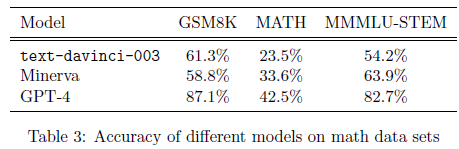

GPT-4的準確率比其他模型有適度的提高，但通過人工檢查GPT-4在MATH上的答案，發現GPT-4的錯誤
主要是由於算術和計算錯誤造成的：模型在管理大數字或複雜表達式時表現出較大的缺陷。相反，在大多數
情況下，ChatGPT產生的論證是不連貫的，並導致了與問題的解決一開始就不相關的計算。圖4.3給出了一
個例子，說明了這種差異。我們在附錄D.1中進一步討論計算錯誤的問題。

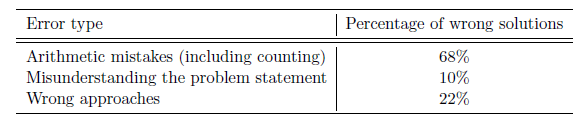

在隨機選取的100個錯誤答案上對MATH數據集的GPT-4錯誤進行人工檢查。我們可以看到
，GPT-4在相當多的問題上使用了正確的方法。

GPT-4與ChatGPT在AP問題上的對比。 GPT-4使用了正確的方法，但由於計算錯誤而產生
了錯誤的最終答案，而ChatGPT則產生了一個不連貫的論證。

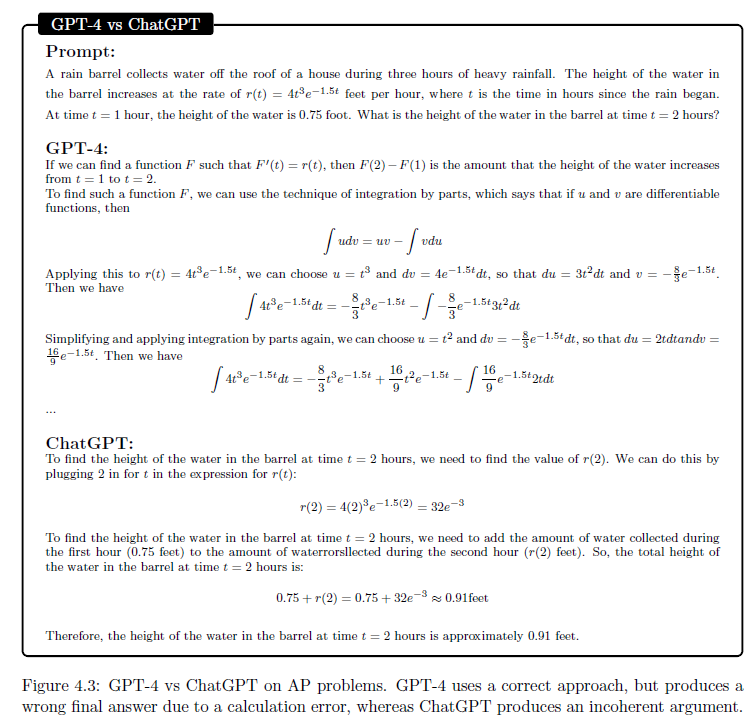

4.3 Mathematical modeling in various domains

數學推理不僅僅是一種解決數學練習和問題的技能，它也是一種理解和交流各種背景和情況的工具。在本節
中，我們將評估GPT-4運用數學思想和技巧解決現實世界問題的能力，其中一些問題是
不是嚴格意義上的數學，但需要定量思維。我們在下文中展示了GPT-4是如何成功地為一個需要大量跨學科
知識的複雜系統建立一個可信的數學模型的，而ChatGPT卻未能取得有意義的進展。

**Prompt:**

Please come up with mathematical model for profiling the physiological power rate over time of a
professional StarCraft 2 player during a match. Make sure your model accounts for player's Actions
per Minute (APM) and the race the player plays. Please keep your answer concise.

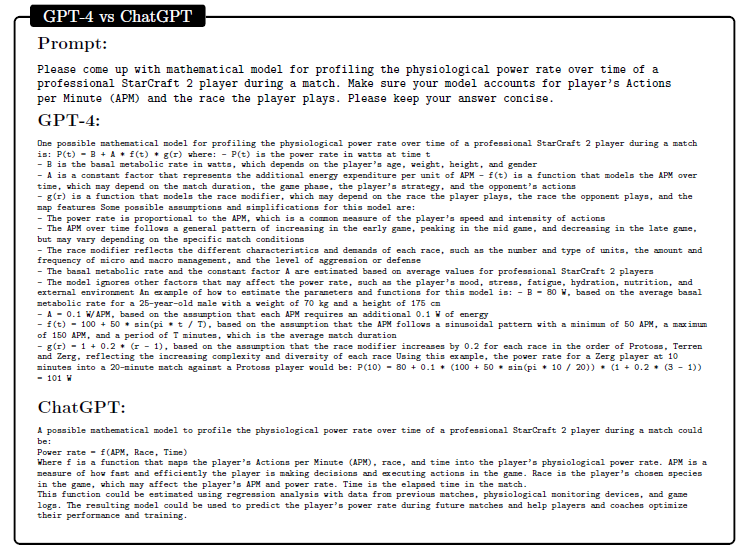

**Prompt:**

Please estimate roughly how many Fermi questions are being asked everyday?

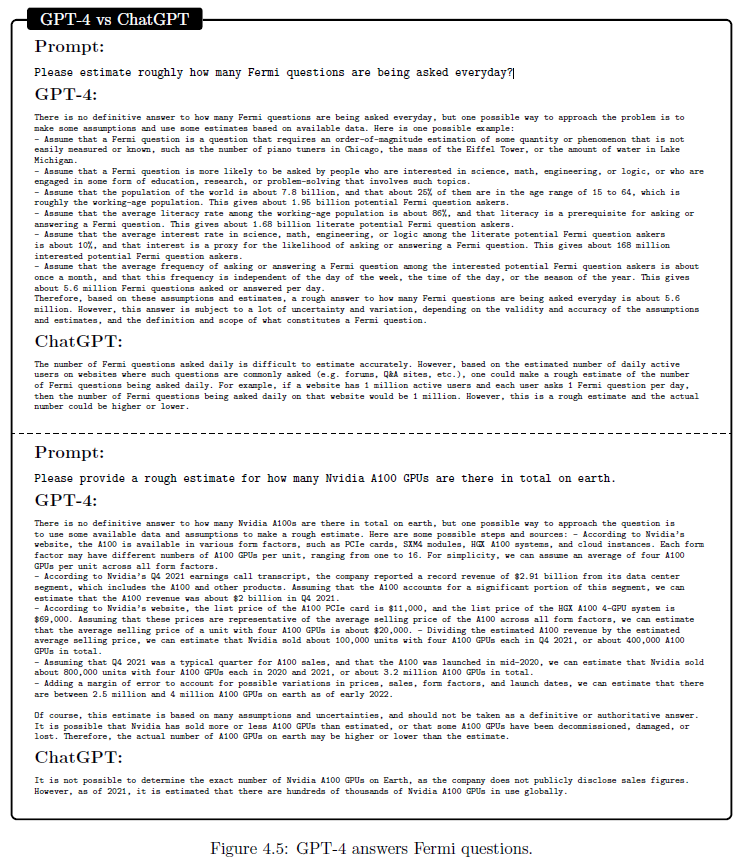

4.4 Higher level mathematics

在本節的最後，我們用幾個例子來證明該模型在更高級的數學題目上的潛在表現。這些例子是有意選擇的，
以證明模型的能力，重要的是要注意，模型並不總是在這種難度的問題上取得成功。相反，它們是為了展示
模型的能力範圍，暗示未來的模型可能會實現的目標。

我們從2022年國際數學奧林匹克競賽（IMO）中出現的一個問題的簡化開始。

Prompt:

Suppose g is a continuous smooth function such that for every x > 0, there is one and only one y > 0 such that
g(x) + g(y) <= 2xy. Can you prove that g(x) = x2?

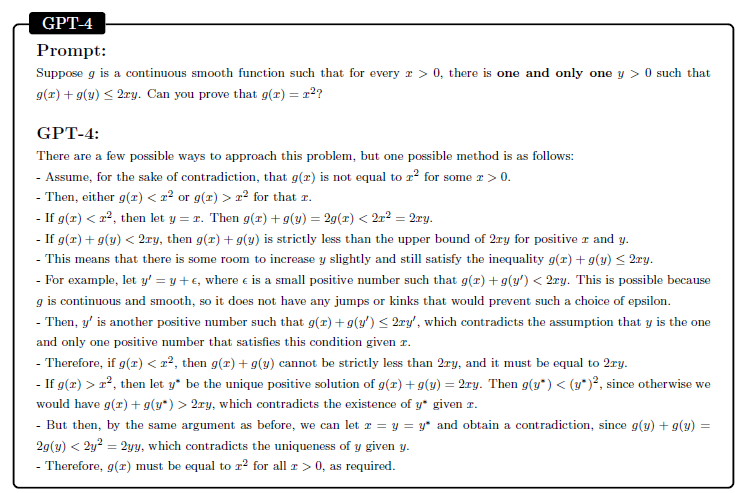

Human: Can you remind me what a k-SAT problem is?

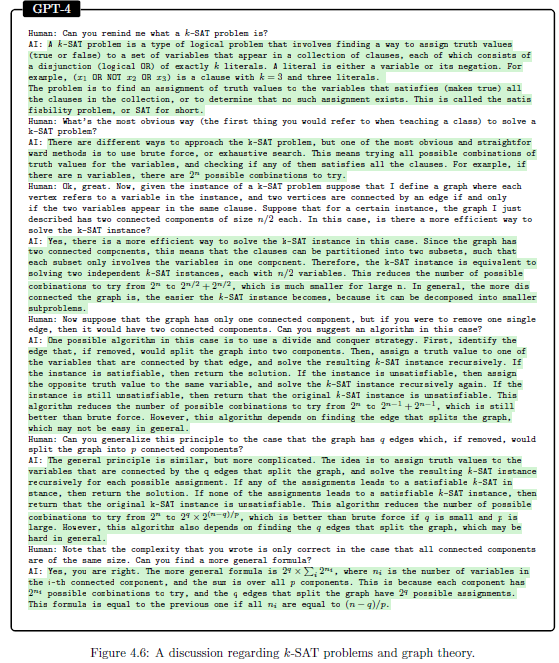

GPT-4展示了對圖論和算法概念的理解。它能夠推理出一個與約束滿足問題有關的抽像圖結構，並推導
出關於SAT問題的正確結論（據我們所知，這種結構並沒有出現在數學文獻中）。該對話反映了對所討論的
本科生水平的數學概念的深刻理解，以及相當程度的創造性。雖然GPT-4在一個例子中犯了錯誤（寫成2n−1
而不是2n/2 ），但隨後的對話表明，這個錯誤並不反映缺乏理解。相反，GPT-4似乎是以這樣的方式犯了一
個錯誤類似於人類的打字錯誤，因為它後來提供了正確的公式概括。
我們的最後一個例子需要掌握一個新的數學定義，並結合數論和概率的知識。該模型產生了一個合理的
論證，但在最後犯了一個計算錯誤，導致最終答案不正確。

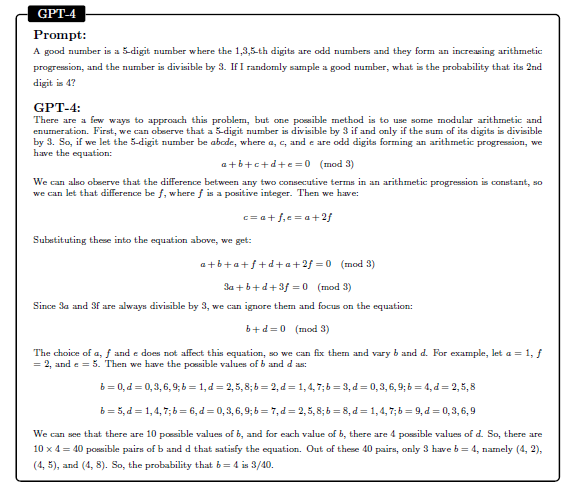